In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.tseries.offsets import BDay
from scipy.interpolate import interp1d
from py_vollib.black_scholes import implied_volatility

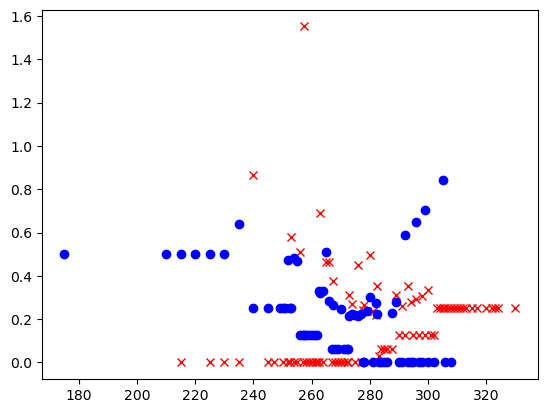

In [ ]:
# clean up not active strikes
# get ATM implied vol for each strike

# filter out small option premiums and strike price too far away from future price
fstd_filtered = pd.DataFrame
# futs = str(fut_mk_data['fut_contract'].unique())
nstd = 10
res = {}

for opt in au_oop_data['opt_contract'].unique():
    print(opt)

    fo_data = au_oop_data[(au_oop_data['opt_contract'] == opt) & (au_oop_data['premium'] >= 1)]
    print(f"{opt} : {fo_data['fut_contract'].unique()}")
    future_price = fo_data['fut_price'].unique()[0]

    puts = fo_data[fo_data['callPut'] == 'PUT']
    last = 0
    for i, val in enumerate(puts['premium'].diff().vlaues):
        if val == 0:
            last = i
    
    puts = puts.iloc[last+1:,]
    print('Puts:' , len(puts))

    calls = fo_data[fo_data['callPut'] == 'CALL']
    first = len(calls)

    for i, val in enumerate(calls['premium'].diff().vlaues):
        if val == 0:
            first = i
            break
    calls = calls.iloc[:first]
    print('Calls: ', len(calls))
    print('Total: ', len(puts) + len(calls))

    fstd_filtered = pd.concat([fstd_filtered, puts, calls])

    

# expire_dates = [datetime.strptime(ed, '%Y-%m-%d').date() for ed in gcft.options]

# query_date = datetime.today().date()
# target_date = (query_date + BDay(21)).date()

# options = gcft.option_chain(target_date)

# df = pd.merge(
#             options.calls[['strike', 'impliedVolatility']],
#             options.puts[['strike', 'impliedVolatility']],
#             on='strike',
#             suffixes=['_call', '_put']
#     )

# latest_underlying_asset = gcf.iloc[-1]
# query_date = latest_underlying_asset['Date']
# underlying_asset_price = latest_underlying_asset['Close']
# underlying_asset_price

# before_target = [bd for bd in expire_dates if datetime.strptime(bd, '%Y-%m-%d').date() < target_date][-1]
# after_target = []
# df['mid_iv'] = (df['impliedVolatility_call'] + df['impliedVolatility_put']) / 2
# smile_interp = interp1d(df['strike'], df['mid_iv'], kind='linear')

# print(f"range for mid_iv: {max(df['mid_iv'])}, {min(df['mid_iv'])}")
# print(f"range for strike: {max(df['strike'])}, {min(df['strike'])}")

# xnew = np.arange(260, 280, 1)
# ynew = smile_interp(xnew)   # use interpolation function returned by `interp1d`
# plt.plot(x, y, 'o', xnew, ynew, '-')
# plt.show()

strikes = np.concatenate([options.calls['strike'], options.puts['strike']])
yf_iv = np.concatenate([options.calls['impliedVolatility'].fillna(0), options.puts['impliedVolatility'].fillna(0)])

# Sort by strike price
sorted_indices = np.argsort(strikes)
strikes = strikes[sorted_indices]

yf_iv = yf_iv[sorted_indices]

# plt.plot(strikes, yf_iv, 'o', xnew, ynew, '-')
plt.plot(options.calls['strike'], options.calls['impliedVolatility'], 'rx', options.puts['strike'], options.puts['impliedVolatility'], 'bo')
plt.show()

# print(underlying_asset_price)
# df[30:50]

In [85]:
options.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,GLD250411C00215000,2025-03-20 15:49:35+00:00,215.0,65.73,0.0,0.0,0.0,0.0,NaN,5,0.000010,True,REGULAR,USD
1,GLD250411C00225000,2025-03-07 16:14:06+00:00,225.0,44.50,0.0,0.0,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD
2,GLD250411C00230000,2025-04-07 14:22:30+00:00,230.0,48.85,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD
3,GLD250411C00235000,2025-04-02 17:33:22+00:00,235.0,53.35,0.0,0.0,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD
4,GLD250411C00240000,2025-03-11 15:21:06+00:00,240.0,29.90,36.3,40.4,0.0,0.0,NaN,1,0.864259,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,GLD250411C00320000,2025-04-01 15:59:13+00:00,320.0,0.04,0.0,0.0,0.0,0.0,3.0,9,0.250007,False,REGULAR,USD
79,GLD250411C00322000,2025-04-04 15:20:50+00:00,322.0,0.01,0.0,0.0,0.0,0.0,6.0,4,0.250007,False,REGULAR,USD
80,GLD250411C00323000,2025-04-04 15:13:27+00:00,323.0,0.06,0.0,0.0,0.0,0.0,1.0,1039,0.250007,False,REGULAR,USD
81,GLD250411C00324000,2025-04-04 15:10:52+00:00,324.0,0.04,0.0,0.0,0.0,0.0,2.0,2,0.250007,False,REGULAR,USD


In [ ]:


# Then interpolate the implied vol for target date

# gcft = yf.Ticker('GLD')
# gcf = gcft.history(period='30d')
# gcf.reset_index(inplace=True)
# gcf['Date'] = gcf['Date'].apply(lambda d: d.date())

expire_dates = gcft.options
expire_dates = [datetime.strptime(ed, '%Y-%m-%d').date() for ed in expire_dates]
# target_date = expire_dates[1]
# start_date = datetime.strptime(target_date, '%Y-%m-%d') + BDay(-21)

def get_atm_iv(options, asset_price):
    df = pd.merge(
            options.calls[['strike', 'impliedVolatility']],
            options.puts[['strike', 'impliedVolatility']],
            on='strike',
            suffixes=['_call', '_put']
    )

    df['mid_iv'] = (df['impliedVolatility_call'] + df['impliedVolatility_put']) / 2
    smile_interp = interp1d(df['strike'], df['mid_iv'], kind='quadratic')
    atm_iv = smile_interp(asset_price)
    return atm_iv

    

# Find ATM Implied vol for each expiry
latest_underlying_asset = gcf.iloc[-1]
query_date = latest_underlying_asset['Date']
underlying_asset_price = latest_underlying_asset['Close']

expire_dates = gcft.options
# atm_iv_df = pd.DataFrame(columns=['expiry', 'implied_vol'])

atm_iv_list = []
for e in expire_dates:
    atm_iv = get_atm_iv(gcft.option_chain(e), underlying_asset_price)
    atm_iv_list.append({'expiry':e, 
                        'implied_vol':atm_iv})
atm_iv_df = pd.DataFrame(atm_iv_list)

atm_iv_df

,expiry,implied_vol
0,2025-04-09,0.0014853720999291067
1,2025-04-11,0.001424946663174782
2,2025-04-14,0.0012958552983967611
3,2025-04-16,0.000946433315366755
4,2025-04-17,0.0009469251714226387
5,2025-04-25,0.0007173549479187183
6,2025-05-02,0.0007821957662096959
7,2025-05-09,0.0004450098668630505
8,2025-05-16,0.00047846258571131937
9,2025-05-23,-0.0002114963819070401


In [ ]:
def interpolate_iv(iv1, t1, iv2, t2, target_days=30):
    # Convert to years
    T1, T2, T = t1 / 365, t2 / 365, target_days / 365
    var1 = (iv1**2) * T1
    var2 = (iv2**2) * T2
    var_T = ((T2 - T) * var1 + (T - T1) * var2) / (T2 - T1)
    iv_T = (var_T / T)**0.5
    return iv_T


In [17]:
gcf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2025-02-25,271.459991,271.679993,266.450012,268.619995,10079800,0.0,0.0,0.0
1,2025-02-26,267.079987,269.079987,266.660004,269.029999,7276000,0.0,0.0,0.0
2,2025-02-27,266.489990,266.670013,264.450012,264.929993,9374600,0.0,0.0,0.0
3,2025-02-28,262.559998,263.399994,261.250000,263.269989,11504500,0.0,0.0,0.0
4,2025-03-03,265.070007,266.880005,265.070007,266.739990,7725600,0.0,0.0,0.0
5,2025-03-04,269.010010,269.399994,267.519989,269.059998,8481300,0.0,0.0,0.0
6,2025-03-05,267.970001,270.260010,267.959991,269.619995,6990400,0.0,0.0,0.0
7,2025-03-06,268.250000,269.510010,268.160004,268.250000,6136400,0.0,0.0,0.0
8,2025-03-07,269.089996,270.339996,267.640015,268.390015,10431200,0.0,0.0,0.0
9,2025-03-10,267.619995,268.440002,265.640015,266.040009,7593900,0.0,0.0,0.0


In [ ]:
# options = gcft.option_chain(target_date)

options.calls


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,GLD250409C00250000,2025-03-31 19:34:46+00:00,250.0,38.13,23.60,26.95,0.00,0.000000,NaN,2,0.754397,True,REGULAR,USD
1,GLD250409C00263000,2025-04-01 13:39:33+00:00,263.0,25.96,12.00,12.35,0.00,0.000000,NaN,1,0.441900,True,REGULAR,USD
2,GLD250409C00264000,2025-04-03 14:11:29+00:00,264.0,23.19,10.80,11.30,0.00,0.000000,1.0,1,0.406012,True,REGULAR,USD
3,GLD250409C00266000,2025-04-03 16:08:29+00:00,266.0,20.60,9.20,9.50,0.00,0.000000,10.0,12,0.384039,True,REGULAR,USD
4,GLD250409C00269000,2025-04-07 15:19:04+00:00,269.0,7.95,6.55,6.80,-11.04,-58.135860,190.0,6,0.334479,True,REGULAR,USD
5,GLD250409C00270000,2025-04-07 14:49:43+00:00,270.0,7.55,5.60,5.90,-2.04,-21.272158,553.0,31,0.313728,True,REGULAR,USD
6,GLD250409C00271000,2025-04-07 15:26:54+00:00,271.0,5.70,4.95,5.20,-4.97,-46.579197,32.0,3,0.313239,True,REGULAR,USD
7,GLD250409C00272000,2025-04-07 13:40:20+00:00,272.0,4.80,4.15,4.45,-4.90,-50.515460,2.0,10,0.302253,True,REGULAR,USD
8,GLD250409C00273000,2025-04-07 15:52:44+00:00,273.0,3.80,3.60,3.75,-3.80,-50.000000,375.0,74,0.292243,True,REGULAR,USD
9,GLD250409C00274000,2025-04-07 14:20:38+00:00,274.0,3.35,2.93,3.10,-10.60,-75.985660,9.0,27,0.282600,True,REGULAR,USD


In [6]:
# gld_data['Adj Close'].pct_change()
gld_data.head(20)

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2022-01-03,1799.400024,1830.099976,1798.800049,1830.099976,116
2022-01-04,1814.000000,1815.300049,1800.000000,1800.500000,38
2022-01-05,1824.599976,1824.599976,1813.099976,1813.099976,8
2022-01-06,1788.699951,1791.300049,1787.099976,1787.099976,30
2022-01-07,1797.000000,1797.000000,1784.400024,1791.800049,17
2022-01-10,1798.400024,1798.699951,1790.400024,1794.900024,534
2022-01-11,1818.599976,1822.500000,1803.000000,1803.900024,743
2022-01-12,1827.199951,1827.199951,1816.900024,1819.000000,1547
